The dataset is available from here:

Haberman Survival Dataset (haberman.csv):
https://github.com/jbrownlee/Datasets...


Dataset Details:
https://github.com/jbrownlee/Datasets...


# import libraries

In [1]:
import pandas as pd
from pandas import read_csv
from collections import Counter

# load data

In [2]:
columns=["age","year","nodes","class"]
data=read_csv('haberman.csv',header=None,names=columns)

In [3]:
data

,age,year,nodes,class
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [4]:
target=data['class'].values
target

array([1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,

# summary

In [5]:
data.shape

(306, 4)

In [6]:
data.describe()

,age,year,nodes,class
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000262C7AF04F0>,
      dtype=object)

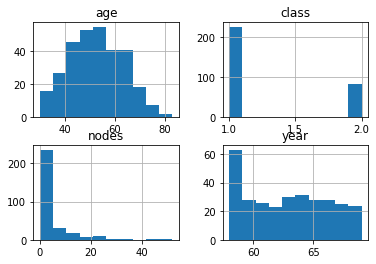

In [7]:
data.hist()

In [8]:
counter=Counter(target)
counter

Counter({1: 225, 2: 81})

In [19]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#define input and output data
x,y=data.values[:,:-1],data.values[:,-1]


#split data
x_train,x_test,y_train,y_test,=train_test_split(x,y,test_size=.5,stratify=y,random_state=3)

# build the model


In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [21]:
num_features=x.shape[1]
model=Sequential()
model.add(Dense(10,activation='relu',input_shape=(num_features,)))
model.add(Dense(1,activation='sigmoid'))

In [22]:
# set configration 
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
model.fit(x_train,y_train,epochs=200,batch_size=20,verbose=0,validation_data=(x_test,y_test))

In [34]:
from sklearn.metrics import accuracy_score
y_predict=model.predict(x_test)
score=accuracy_score(y_predict,y_test)
print('accuracy: %.2f %%' %score)

5/5 [==============================] - 0s 6ms/step
accuracy: 0.74 %
